In [1]:
import scanpy
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from adjustText import adjust_text

In [2]:
sc.settings.verbosity = 0
import warnings
warnings.filterwarnings("ignore")

In [3]:
sc.settings.set_figure_params(dpi=100, fontsize=12, dpi_save=600, figsize=(6,6))

In [4]:
adata = scanpy.read_h5ad("your_file_path/hippo_allcelltypesData.h5ad") #laod the data from your file path

<Axes: title={'center': 'seurat_clusters'}, xlabel='UMAP1', ylabel='UMAP2'>

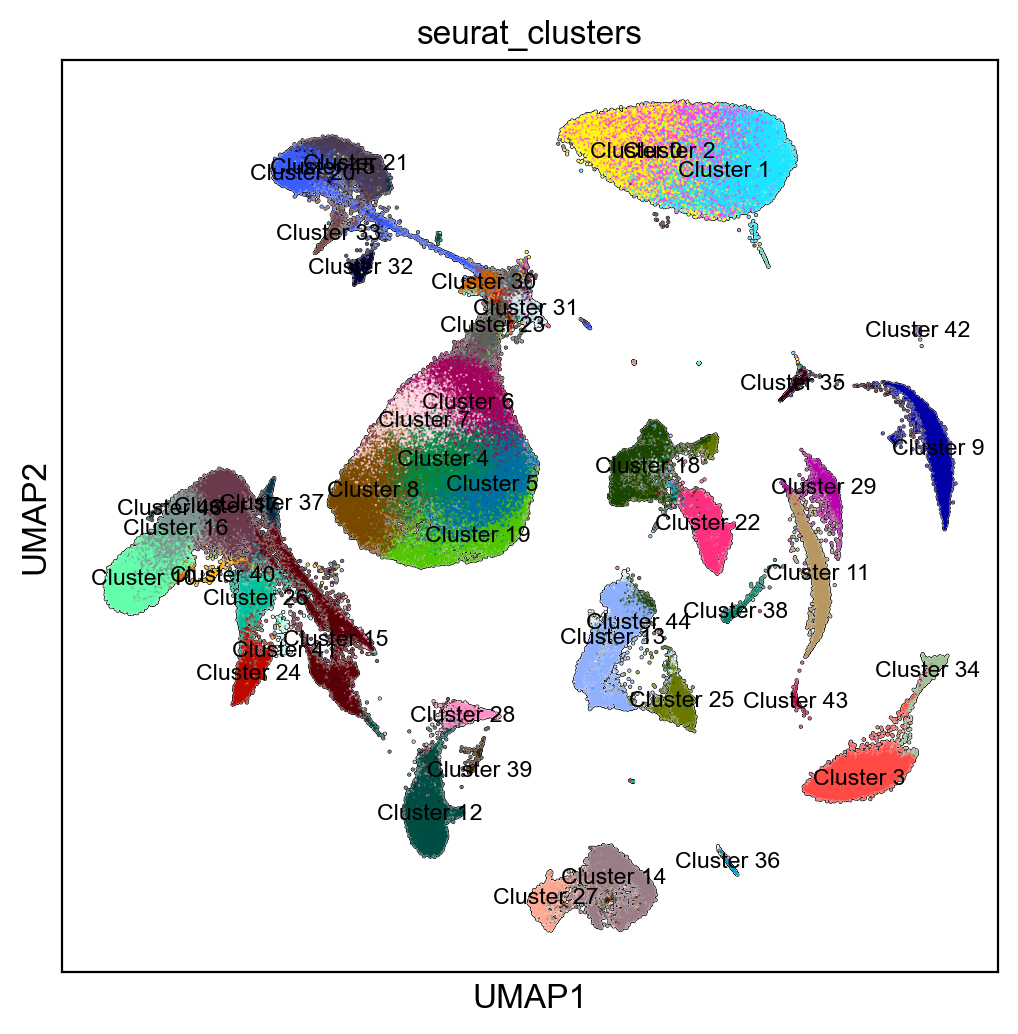

In [7]:
sc.pl.umap(adata, color = ['seurat_clusters'], frameon = True, s=3, add_outline = True,  show=False, legend_loc ='on data', legend_fontweight = 'normal',legend_fontsize = 'x-small')
#plt.savefig("your_file_path//allcelltypes_clusters", dpi=600, bbox_inches='tight', format='pdf')
#plt.show()

<Axes: title={'center': 'seurat_clusters'}, xlabel='UMAP1', ylabel='UMAP2'>

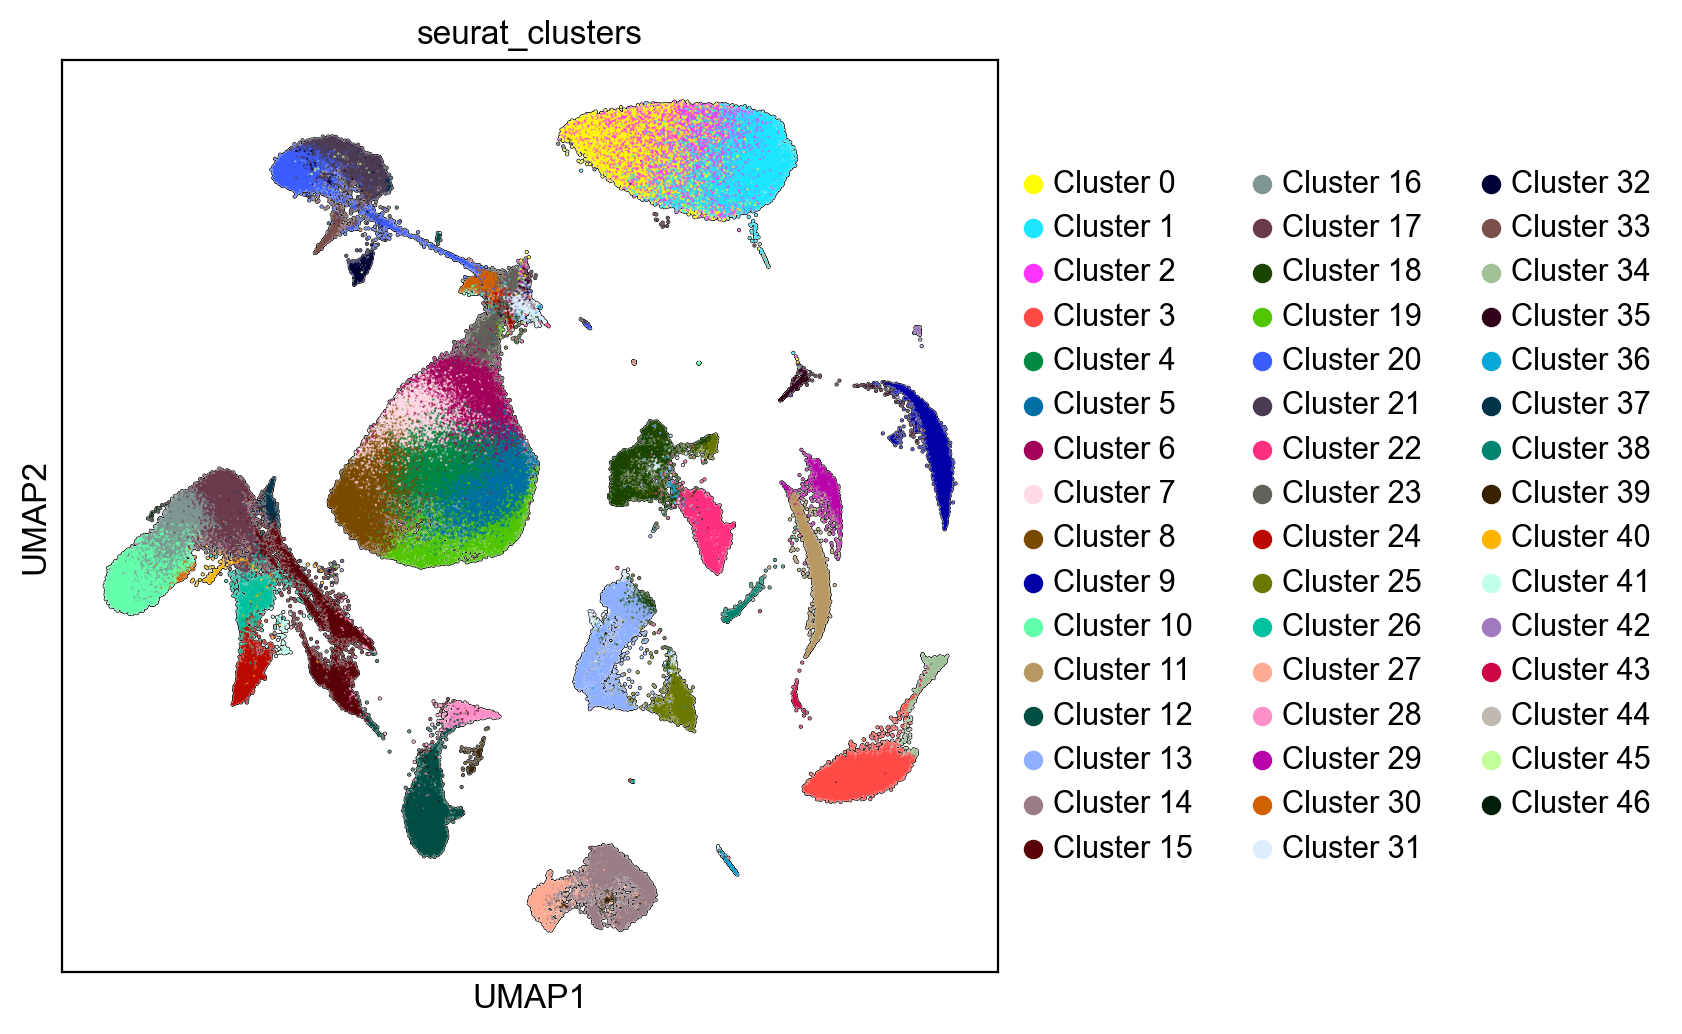

In [8]:
sc.pl.umap(adata, color = ['seurat_clusters'], frameon = True, s=3, add_outline = True,  show=False)

In [8]:
markers_for_hippo = ["Slc17a7", "Mbp", "Mog", "Gad1", "Gad2", "Pcdh15", "Pdgfra", "Vcan", "Arhgap15", "Inpp5d", "Ctss", "Slc1a2", "Slc1a3", "Rorb","Ebf1"]

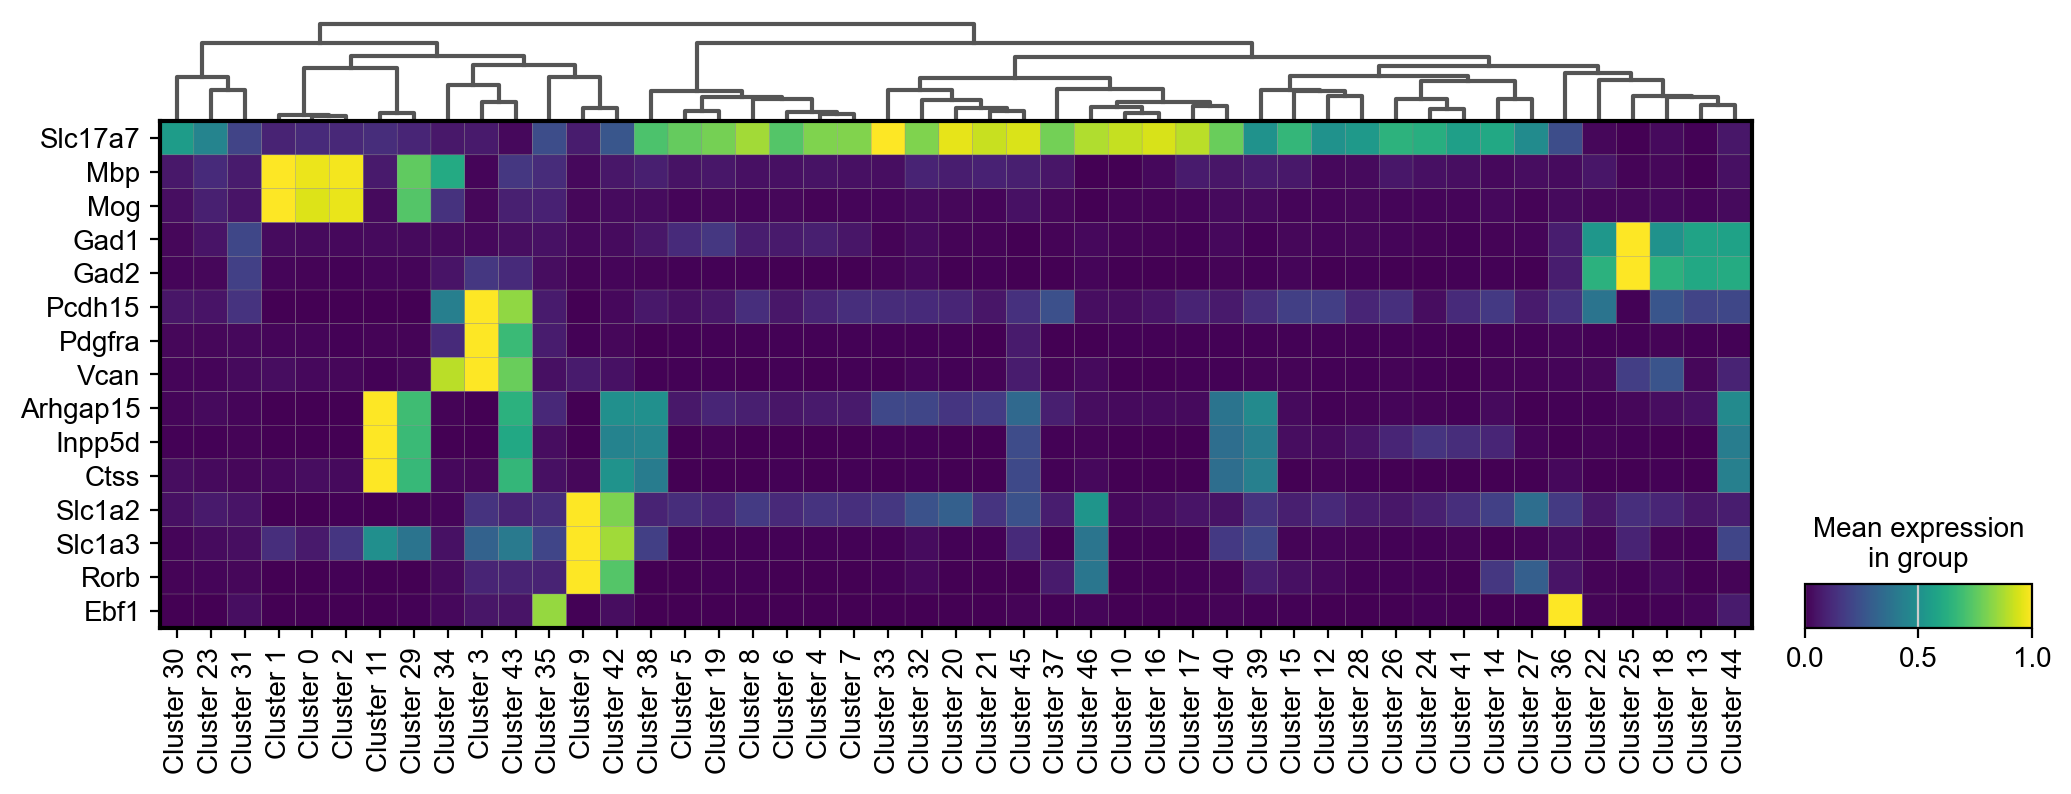

In [10]:
 dp = sc.pl.matrixplot(
    adata, 
    var_names=markers_for_hippo, 
    groupby='seurat_clusters', 
    dendrogram=True,
     #vmin=0,                     # Minimum value for the color scale
    #vmax=3,                      # Maximum value for the color scale
    #cmap='RdBu',
    standard_scale="var",
  swap_axes = True,
    figsize=(12, 4),
show = False)

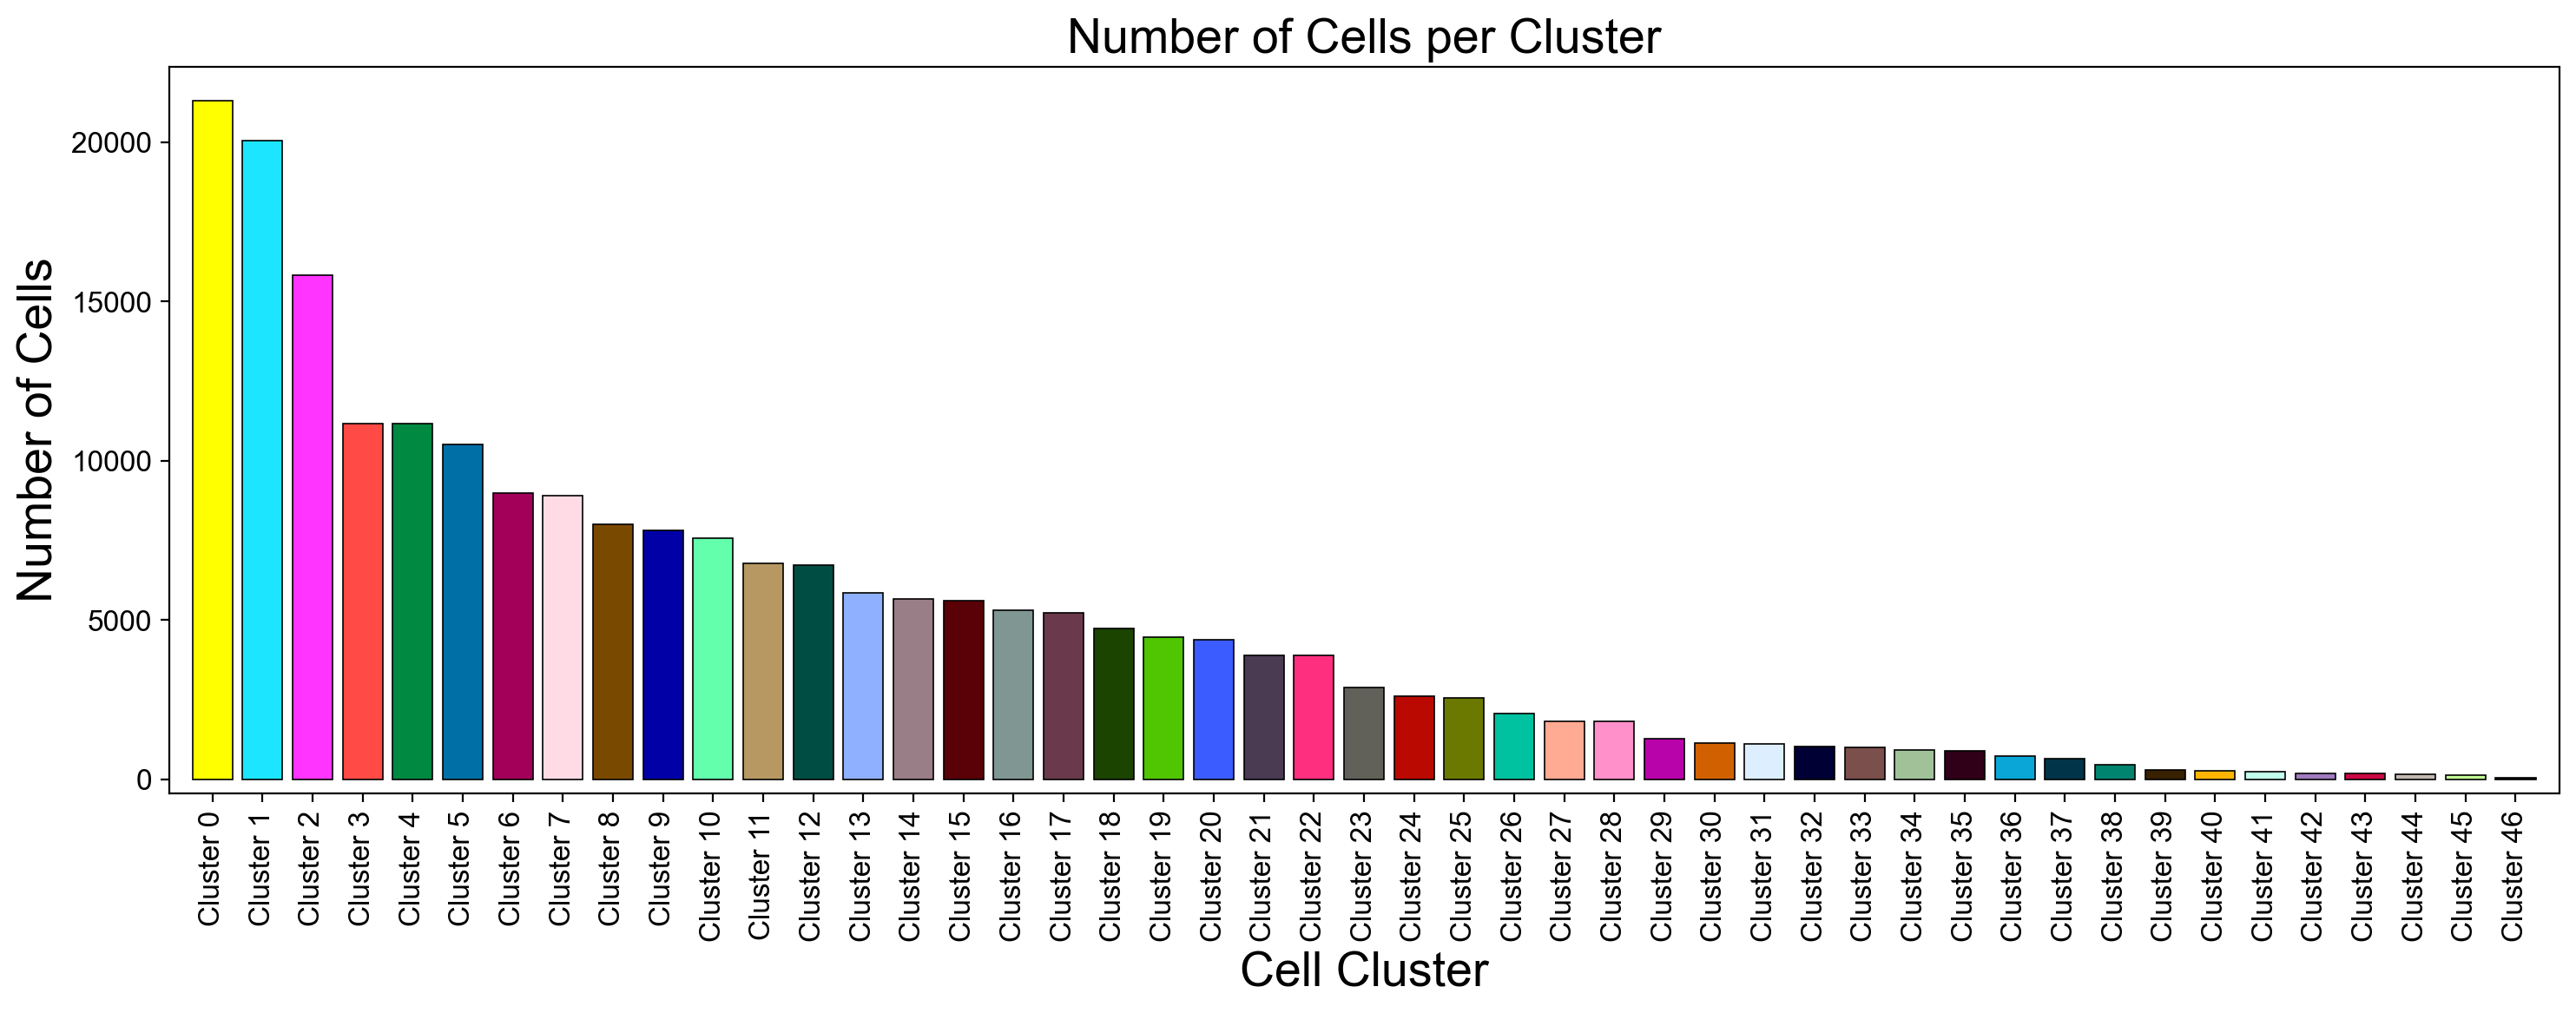

In [12]:
# Calculate and sort cluster counts in descending order
cluster_counts = adata.obs['seurat_clusters'].value_counts()
#cluster_counts = cluster_counts.sort_values(ascending=False)

# Access seurat_clusters_colors from adata.uns
seurat_clusters_colors = adata.uns['seurat_clusters_colors']

# Create the figure and bar plot with sorted counts
plt.figure(figsize=(15, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, edgecolor='black', linewidth=0.6, palette= seurat_clusters_colors, saturation = 1)

# Customize the plot appearance
ax.tick_params(axis='x', labelsize=12, rotation=90)
ax.tick_params(axis='y', labelsize=12)
ax.set_xlabel('Cell Cluster', fontsize=20)
ax.set_ylabel('Number of Cells', fontsize=20)
ax.set_title('Number of Cells per Cluster', fontsize=20)
ax.yaxis.grid(False)                            # no horizontal grid
ax.set_ylim(bottom=-max(cluster_counts.values)*0.02)  # float bars above x-axis
ax.margins(x=0.01)                              # breathing room left/right 
plt.tight_layout()
#plt.savefig("your_file_path/cluster_count", dpi=600, bbox_inches='tight', format='pdf')
plt.show()

In [5]:
cell_type = {
    "Cluster 0": "Oligodendrocytes (Oligo)", "Cluster 1": "Oligodendrocytes (Oligo)", "Cluster 2": "Oligodendrocytes (Oligo)",
    "Cluster 3": "Oligodendrocyte progenitor cells (OPCs)", "Cluster 34": "Oligodendrocyte progenitor cells (OPCs)",
    "Cluster 4": "Excitatory neurons (Ex)", "Cluster 5": "Excitatory neurons (Ex)", "Cluster 6": "Excitatory neurons (Ex)", "Cluster 7": "Excitatory neurons (Ex)", 
    "Cluster 8": "Excitatory neurons (Ex)", "Cluster 10": "Excitatory neurons (Ex)", "Cluster 12": "Excitatory neurons (Ex)",
    "Cluster 14": "Excitatory neurons (Ex)", "Cluster 15": "Excitatory neurons (Ex)", "Cluster 16": "Excitatory neurons (Ex)", "Cluster 17": "Excitatory neurons (Ex)",
    "Cluster 19": "Excitatory neurons (Ex)", "Cluster 20": "Excitatory neurons (Ex)", "Cluster 21": "Excitatory neurons (Ex)",
    "Cluster 23": "Excitatory neurons (Ex)", "Cluster 24": "Excitatory neurons (Ex)", "Cluster 26": "Excitatory neurons (Ex)", "Cluster 27": "Excitatory neurons (Ex)",
    "Cluster 28": "Excitatory neurons (Ex)", "Cluster 30": "Excitatory neurons (Ex)", "Cluster 31": "Excitatory neurons (Ex)",
    "Cluster 32": "Excitatory neurons (Ex)", "Cluster 33": "Excitatory neurons (Ex)", "Cluster 37": "Excitatory neurons (Ex)", "Cluster 41": "Excitatory neurons (Ex)",
    "Cluster 13": "Inhibitory neurons (In)", "Cluster 18": "Inhibitory neurons (In)", "Cluster 22": "Inhibitory neurons (In)", "Cluster 25": "Inhibitory neurons (In)",
    "Cluster 35": "Endothelial (Endo)", "Cluster 36": "Endothelial (Endo)",
    "Cluster 11": "Microglia (Micro)", "Cluster 29": "Microglia (Micro)",
    "Cluster 9": "Astrocytes (Astro)", "Cluster 42": "Astrocytes (Astro)",
    "Cluster 38": "Low-quality cells (LQCs)", "Cluster 39": "Low-quality cells (LQCs)", "Cluster 40": "Low-quality cells (LQCs)", "Cluster 43": "Low-quality cells (LQCs)",
    "Cluster 44": "Low-quality cells (LQCs)", "Cluster 45": "Low-quality cells (LQCs)", "Cluster 46": "Low-quality cells (LQCs)"
}

In [6]:
adata.obs['Cell_type'] = adata.obs.seurat_clusters.map(cell_type)

In [7]:
# Define the desired order of cell types
cell_type_order = [
    "Excitatory neurons (Ex)",
    "Oligodendrocytes (Oligo)",
    "Inhibitory neurons (In)",
    "Oligodendrocyte progenitor cells (OPCs)",
    "Microglia (Micro)",
    "Astrocytes (Astro)",
    "Endothelial (Endo)",
    "Low-quality cells (LQCs)"
]

adata.obs['Cell_type'] = pd.Categorical(
    adata.obs['Cell_type'],
    categories=cell_type_order,
    ordered=True
)

In [9]:
from matplotlib.colors import ListedColormap

cell_type_colors = {
    "Excitatory neurons (Ex)": "#1b4400",
    "Oligodendrocytes (Oligo)": "#a30059",   
    "Inhibitory neurons (In)": "#0aa6d8",
    "Oligodendrocyte progenitor cells (OPCs)": "#0000a6",   
    "Microglia (Micro)": "#5a0007",   
    "Astrocytes (Astro)": "#ff2f80",
    "Endothelial (Endo)": "#63ffac", 
    "Low-quality cells (LQCs)": "#ffb500"}

# Convert cell type colors to a color map
unique_colors = list(cell_type_colors.values())
cmap = ListedColormap(unique_colors)

<Axes: title={'center': 'Cell_type'}, xlabel='UMAP1', ylabel='UMAP2'>

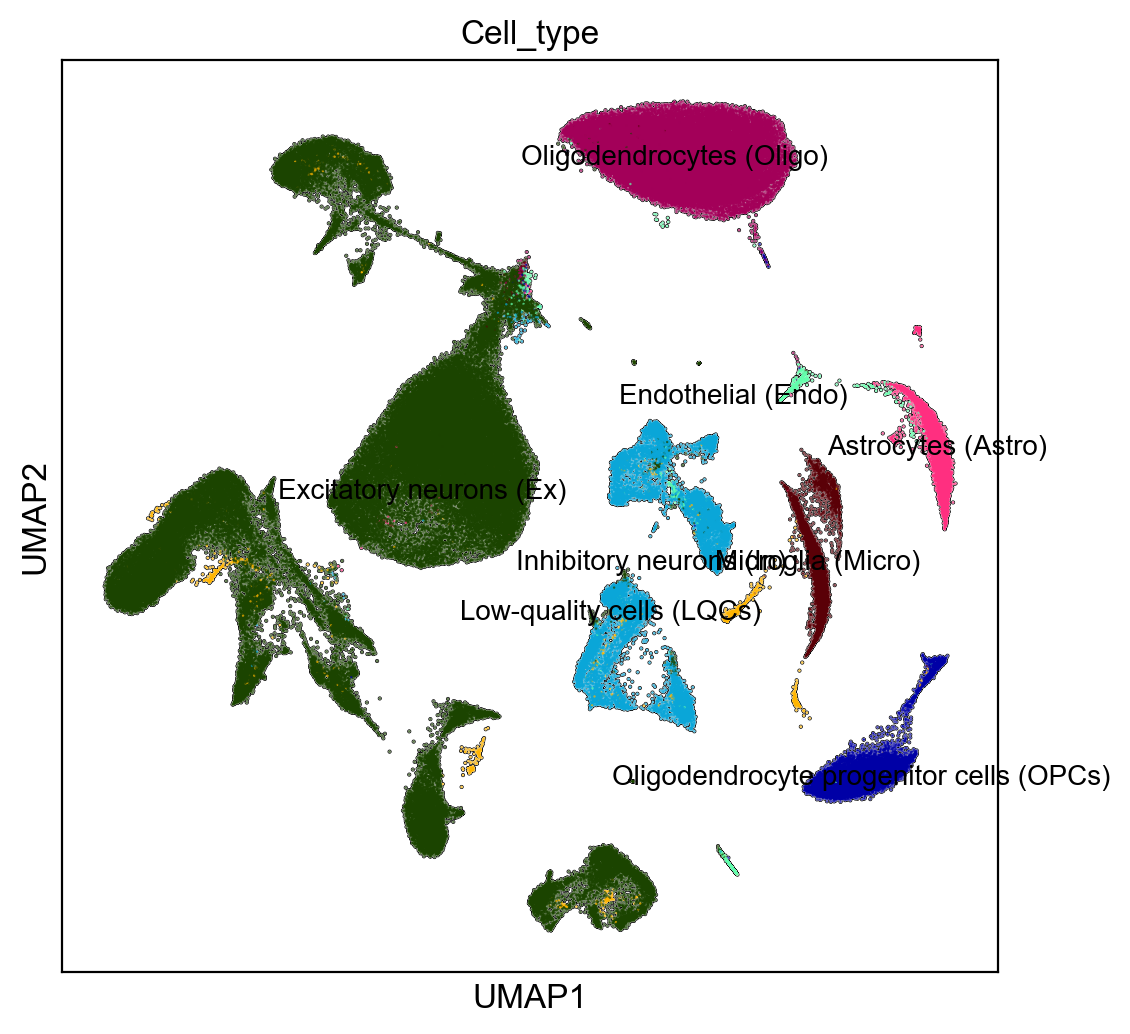

In [17]:
sc.pl.umap(adata, color = ['Cell_type'], frameon = True, s=3, add_outline = True,palette = cell_type_colors, show=False, legend_loc ='on data', legend_fontweight = 'normal',legend_fontsize = 'small')
#plt.savefig("your_file_path/celltypes", dpi=600, bbox_inches='tight', format='pdf')
#plt.show()

<Axes: title={'center': 'Cell_type'}, xlabel='UMAP1', ylabel='UMAP2'>

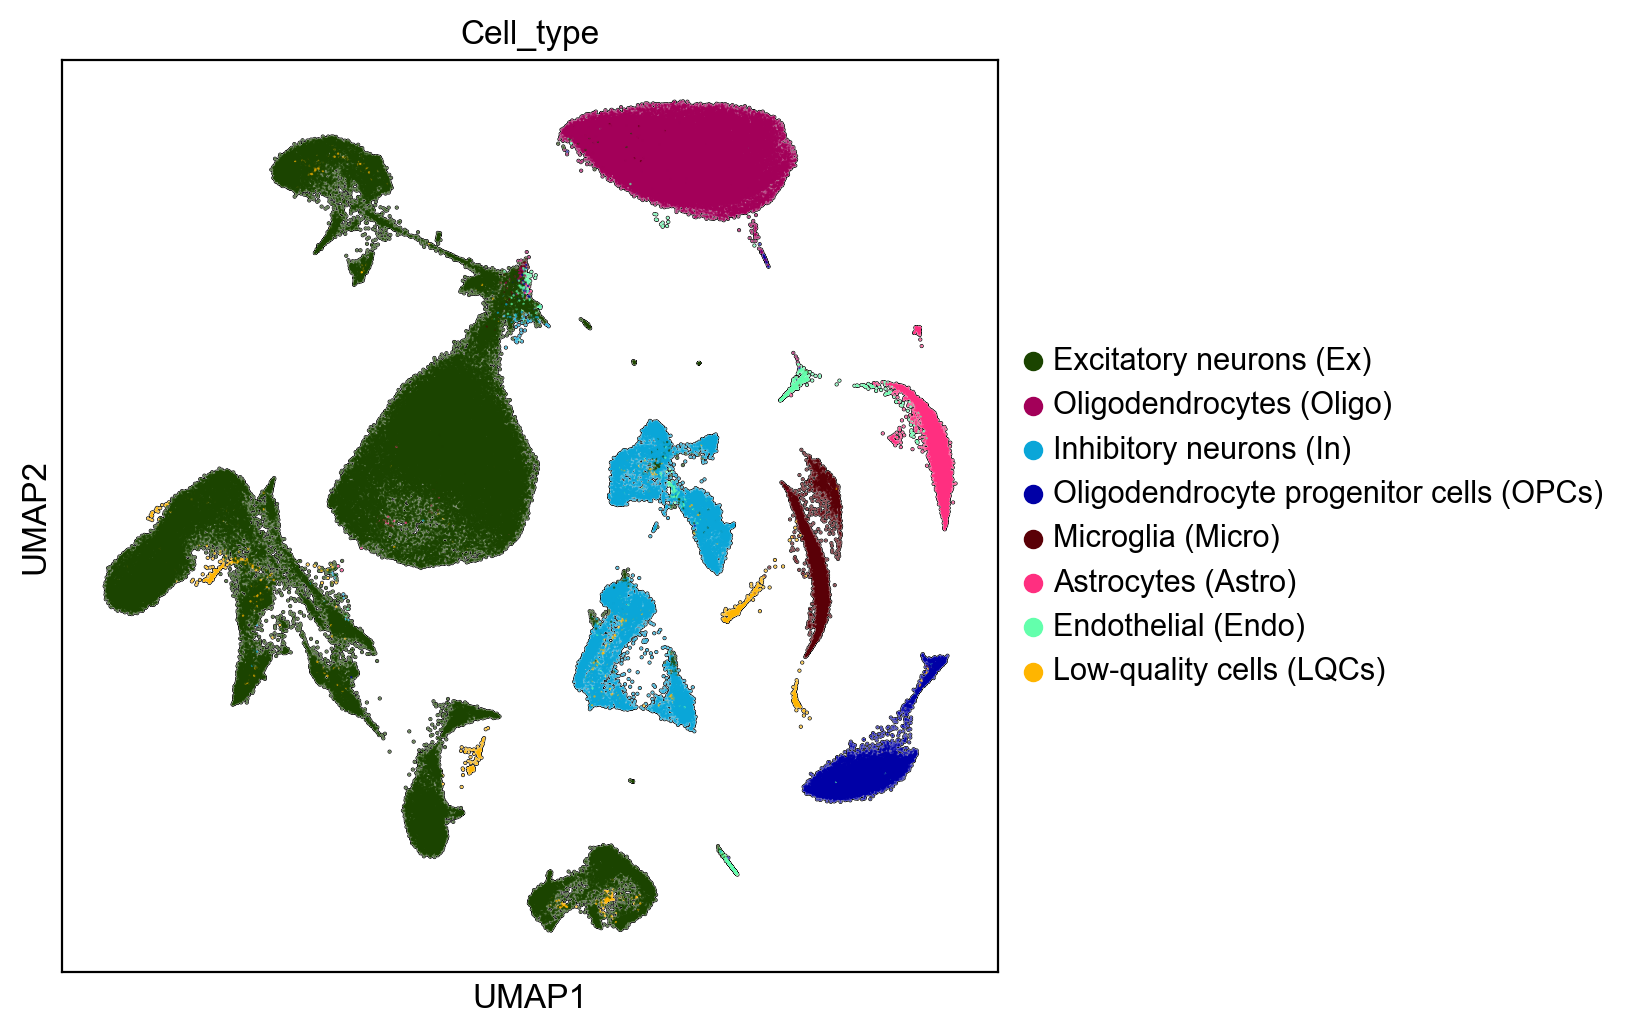

In [10]:
sc.pl.umap(adata, color = ['Cell_type'], frameon = True, s=3, add_outline = True,palette = cell_type_colors, show=False)

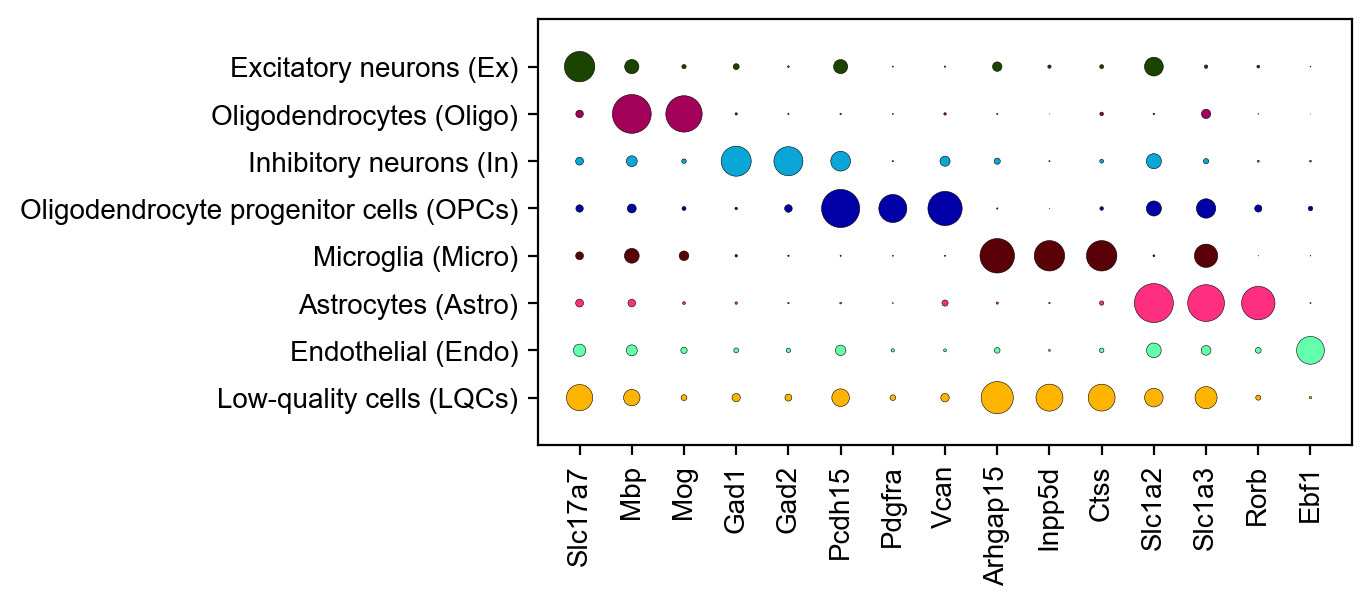

In [19]:
# Create the DotPlot
dp = sc.pl.DotPlot(adata, markers_for_hippo, groupby='Cell_type').style(
    dot_edge_color='black',
    dot_edge_lw=0.1
).legend(show=False)

# Map cell types to integers for color display
color_mapping = {cell_type: idx for idx, cell_type in enumerate(cell_type_colors.keys())}
for cell_type, idx in color_mapping.items():
    if cell_type in dp.dot_color_df.index:
        dp.dot_color_df.loc[cell_type, :] = idx

# Set the custom colormap
dp.style(cmap=cmap)

dp.show()
#dp.savefig("your_file_path/celltypes/celltypes_dotplot", dpi=600, bbox_inches='tight', format='pdf')


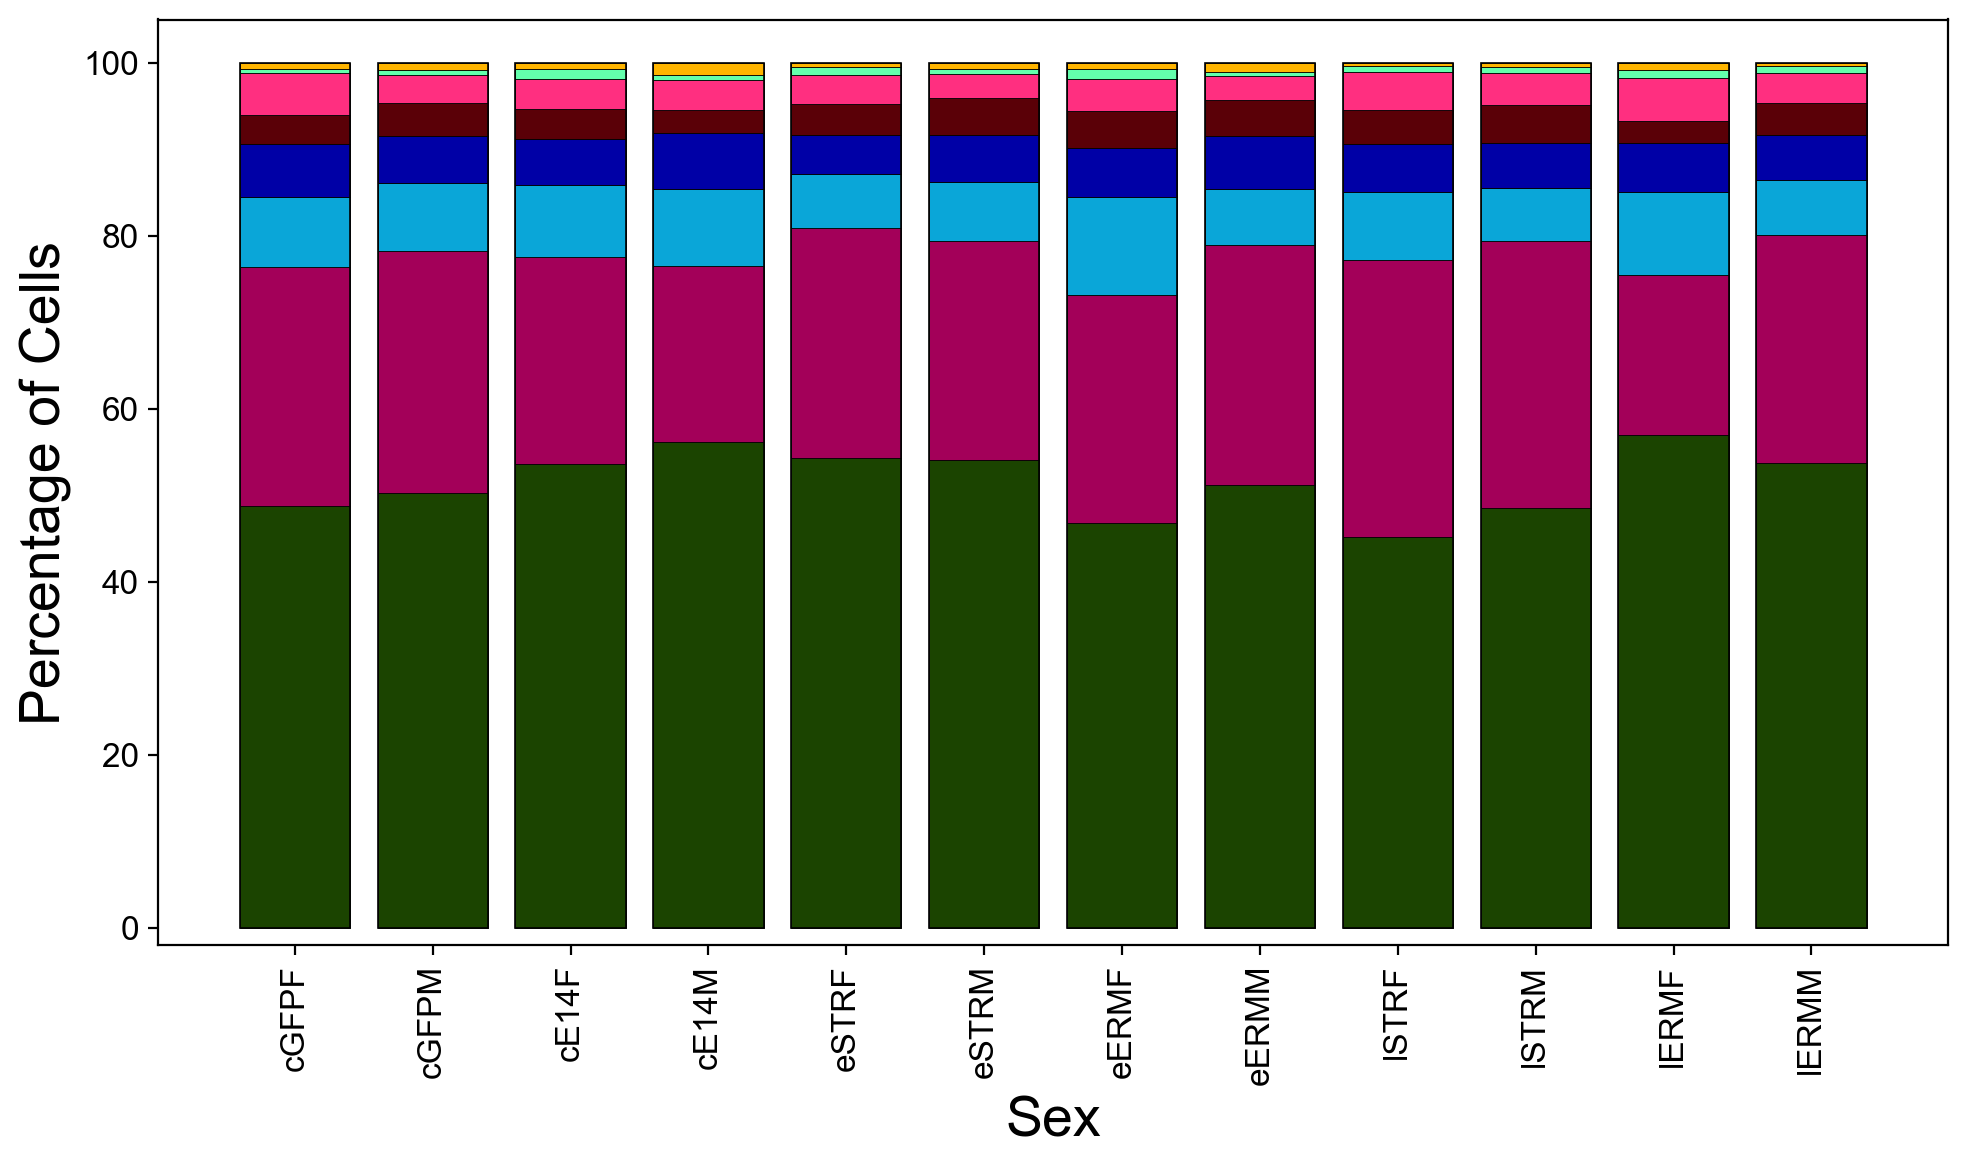

In [28]:
colors = [cell_type_colors[ct] for ct in df.columns]
# Count cells per Sex and Cell_type
cell_counts = adata.obs.groupby(['Sex','Cell_type']).size().reset_index(name='count')

# Normalize within each Sex
cell_counts['proportion'] = cell_counts.groupby('Sex')['count'].transform(lambda x: x / x.sum() * 100)

# Pivot to wide format
df = cell_counts.pivot(index='Sex', columns='Cell_type', values='proportion').fillna(0)

desired_order = [
    'cGFPF','cGFPM','cE14F','cE14M',
    'eSTRF','eSTRM','eERMF','eERMM',
    'lSTRF','lSTRM','lERMF','lERMM'
]

df = df.loc[desired_order]

plt.figure(figsize=(10, 6))
width = 0.8
x = range(len(df.index))

for i, cell_type in enumerate(df.columns):
    plt.bar(
        x,
        df[cell_type],
        width=width,
        bottom=df.iloc[:, :i].sum(axis=1) if i > 0 else None,
        color=colors[i],
        edgecolor='black',
        linewidth=0.3,
        label=cell_type
    )

plt.bar(
    x,
    df.sum(axis=1),
    width=width,
    facecolor='none',
    edgecolor='black',
    linewidth=0.6
)

plt.xticks(ticks=x, labels=df.index, rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Sex', fontsize=20)
plt.ylabel('Percentage of Cells', fontsize=20)

ax = plt.gca()
ax.grid(False)  
ymax = df.to_numpy().sum(axis=1).max()
ax.set_ylim(bottom=-ymax*0.02)

plt.tight_layout()
plt.show()

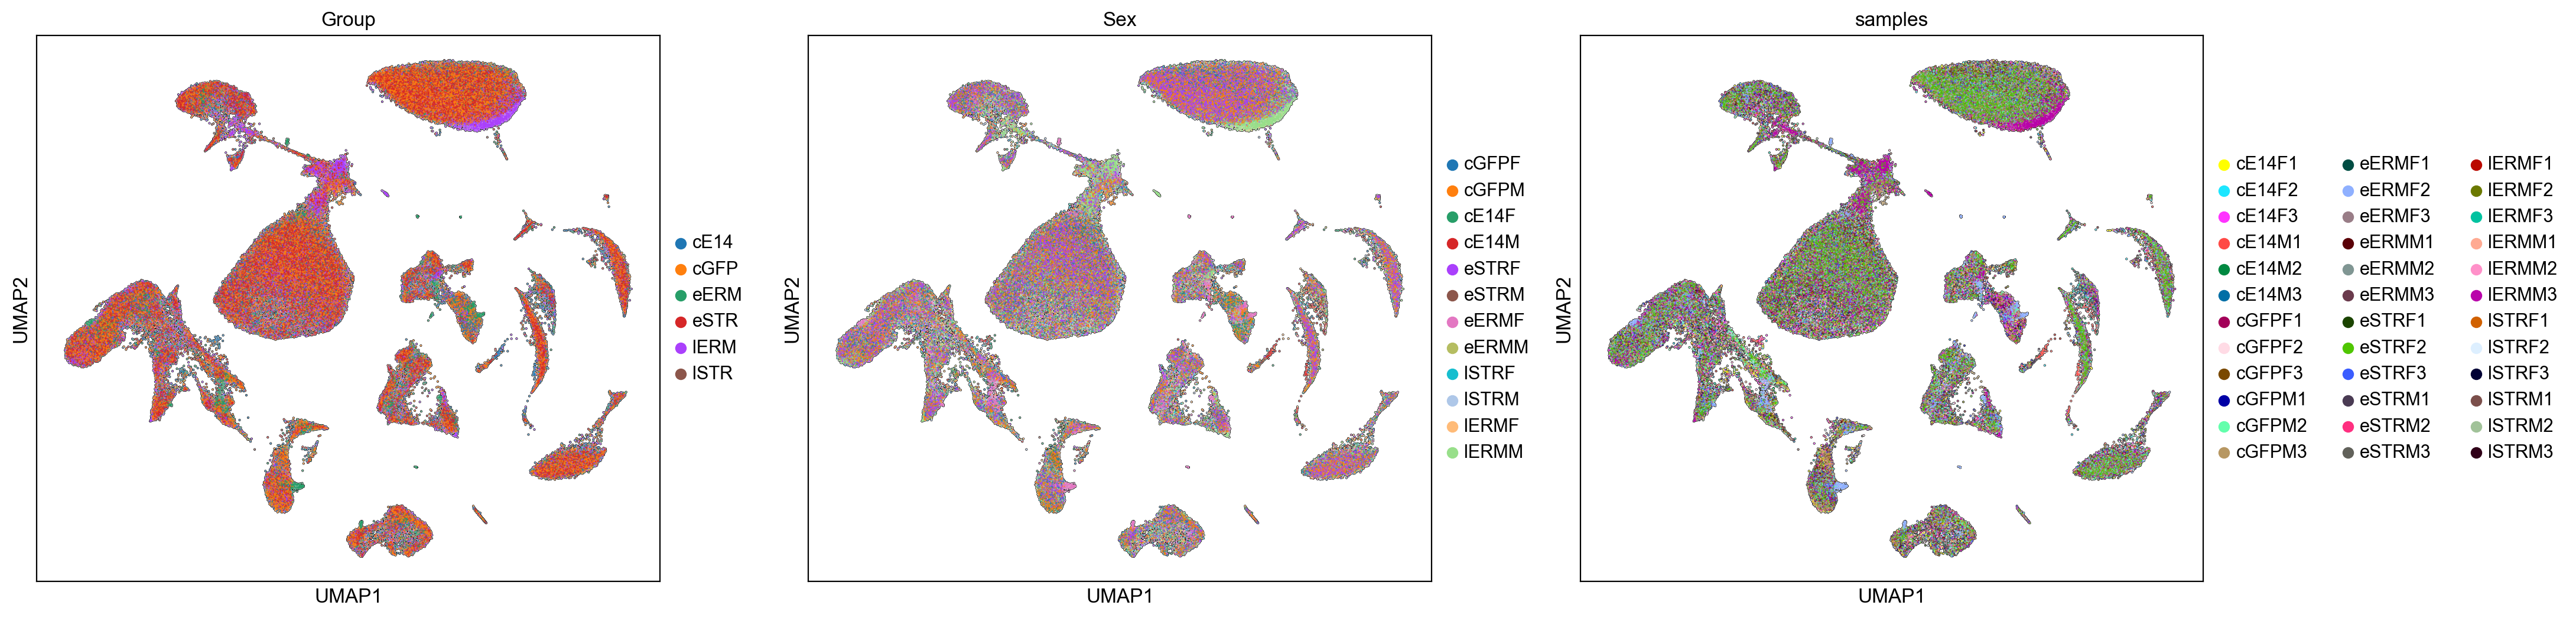

In [15]:
from matplotlib.pyplot import rc_context

with rc_context({"figure.figsize": (7, 6)}):
    sc.pl.umap(adata, color = ['Group', 'Sex','samples'], frameon = True, s=3, add_outline = True, show=False)
plt.tight_layout()
plt.show()
